# Feature Imporatnce Analysis

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import configparser
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from src.utils import utils
from src.modelling import training as train



%matplotlib inline

%load_ext autoreload
%autoreload 2

## Read data

In [2]:
proj_root = utils.get_proj_root()
config = configparser.ConfigParser(interpolation=None)
config.read(proj_root.joinpath('config/data_config.ini'))

inf_year = int(config["year_limits"]["inf_year"])
final_year = inf_year - 2
training_data_rel_path = config['data_paths']['preprocessed_data_path']

training_data_path =  proj_root.joinpath(training_data_rel_path)
# training_data_subset_path  = proj_root.joinpath(config['data_paths']['training_subset_path'])
# testing_data_subset_path  = proj_root.joinpath(config['data_paths']['testing_subset_path'])

In [3]:
# get data
training_data = train.get_training_data(file_path=training_data_path)

from src.modelling import transforms
from sklearn.pipeline import Pipeline

categorical_features = ['industry', 'symbol']
collinear_thresh = 0.98
label_col_name = 'dps_change_next_year'

pipeline = Pipeline(steps=[
    ('cat_to_ordinal_cols', transforms.ColumnsOrdinalEncoder(col_names=categorical_features)),
    ('remove collinear columns', transforms.CollinearColsRemover(thresh=collinear_thresh, 
                                                                    label_col=label_col_name)),
])


training_data = pipeline.fit_transform(training_data)

# split dataset
train_data, test_data = train.train_test_split(df=training_data, final_year=final_year)
print(training_data.shape, train_data.shape, test_data.shape)
training_data.head()

(4647, 93) (4176, 93) (471, 93)


,year,industry,symbol,calendarYear,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
0,2013,23.0,288.0,2011,2.249586,12.138617,1.387061,4.359516,47.666577,-3.682429,...,295.379441,0.026854,10.266674,8.207810,-9.268087,0.11,-21.428571,2.54,7.627119,0
1,2014,23.0,288.0,2012,2.198387,-2.275946,1.385806,-0.090461,49.567449,3.987852,...,6.939145,0.025377,-5.500411,8.692139,5.900833,0.09,-18.181818,3.42,34.645669,0
2,2015,23.0,288.0,2013,1.698186,-22.753086,1.012270,-26.954450,50.284895,1.447414,...,21.913077,0.018089,-28.717392,12.326051,41.806877,0.13,44.444444,4.10,19.883041,0
3,2016,23.0,288.0,2014,1.961487,15.504836,1.127209,11.354593,48.611609,-3.327613,...,-39.851336,0.020773,14.836058,13.065263,5.997151,0.40,207.692308,4.44,8.292683,0
4,2017,23.0,288.0,2015,1.543411,-21.314241,0.852768,-24.346986,50.082909,3.026645,...,799.567847,0.027175,30.819267,12.318266,-5.717433,1.00,150.000000,4.70,5.855856,0


In [4]:
test_data.head()

,year,industry,symbol,calendarYear,currentRatio,currentRatio_percentage_change,quickRatio,quickRatio_percentage_change,daysOfSalesOutstanding,daysOfSalesOutstanding_percentage_change,...,priceEarningsToGrowthRatio_percentage_change,dividendYield,dividendYield_percentage_change,enterpriseValueMultiple,enterpriseValueMultiple_percentage_change,interestRate,interestRate_percentage_change,adjDividend,dps_growth,dps_change_next_year
9,2022,23.0,288.0,2020,1.885003,34.018142,1.225843,56.099475,53.359589,-1.941498,...,-161.298579,0.033558,3.016963,18.075467,-10.437063,1.68,2000.0,5.96,0.675676,0
19,2022,95.0,33.0,2020,1.825567,-6.738398,1.438114,-3.382067,73.748834,2.575034,...,271.855366,0.017922,-5.320931,15.642247,12.141843,1.68,2000.0,1.14,7.547170,0
29,2022,63.0,4.0,2020,1.716721,19.031997,1.138994,29.355885,67.646498,8.992810,...,164.529979,0.013201,-10.974509,27.231692,7.857725,1.68,2000.0,1.88,4.444444,0
38,2022,30.0,3.0,2020,0.843411,-73.455524,0.603643,-79.256109,70.300192,18.038693,...,-311.045908,0.043198,-11.020003,36.882978,222.164934,1.68,2000.0,5.64,8.461538,0
48,2022,49.0,6.0,2021,1.251937,-10.687424,1.139527,-11.782243,70.266362,8.749094,...,-45.271038,0.010467,-21.579906,21.516834,24.968678,1.68,2000.0,4.03,11.634349,0


In [5]:

# train_data =  pd.read_csv(training_data_subset_path)
# test_data = pd.read_csv(testing_data_subset_path)
train_data.head()
print(train_data.shape, test_data.shape)

(4176, 93) (471, 93)


In [6]:
label_col_name = 'dps_change_next_year'
X_train, y_train = train.split_Xy(train_data, label_col_name=label_col_name)
X_test, y_test = train.split_Xy(test_data, label_col_name=label_col_name)

# Feature Importance

## check feature importance

In [7]:


randomForestModel = RandomForestClassifier(max_features=None)  # We want all features to be considered for each tree



randomForestModel.fit(X_train, y_train)
model_importance = randomForestModel.feature_importances_
importance_table = pd.DataFrame(columns=["Feature", "Importance"])  # Create an importance table to plot bar chart
featureNum = 0
for score in model_importance:
    # print("feature " + str(featureNum) + "'s importance score: " + str(score) + " (" + X_train.columns[featureNum] + ")")
    rowAdded = pd.DataFrame([[X_train.columns[featureNum], score]], columns=["Feature", "Importance"])
    importance_table = pd.concat([importance_table, rowAdded])
    featureNum = featureNum + 1
importance_table_sorted =  importance_table.sort_values('Importance', ascending=False).reset_index(drop=True)




/tmp/ipykernel_26682/31530044.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  importance_table = pd.concat([importance_table, rowAdded])


In [8]:

importance_table_sorted =  importance_table.sort_values('Importance', ascending=False).reset_index(drop=True)
importance_table_sorted

,Feature,Importance
0,dps_growth,0.124270
1,adjDividend,0.065863
2,grossProfitMargin_percentage_change,0.022492
3,payoutRatio,0.019383
4,interestRate_percentage_change,0.018660
...,...,...
87,returnOnEquity_percentage_change,0.004019
88,netProfitMargin_percentage_change,0.003713
89,priceEarningsRatio_percentage_change,0.003627
90,calendarYear,0.002432


In [9]:

feature_importance_path = proj_root.joinpath(config['modelling_paths']['feature_importance'])
importance_table_sorted.to_csv(feature_importance_path, index=False)

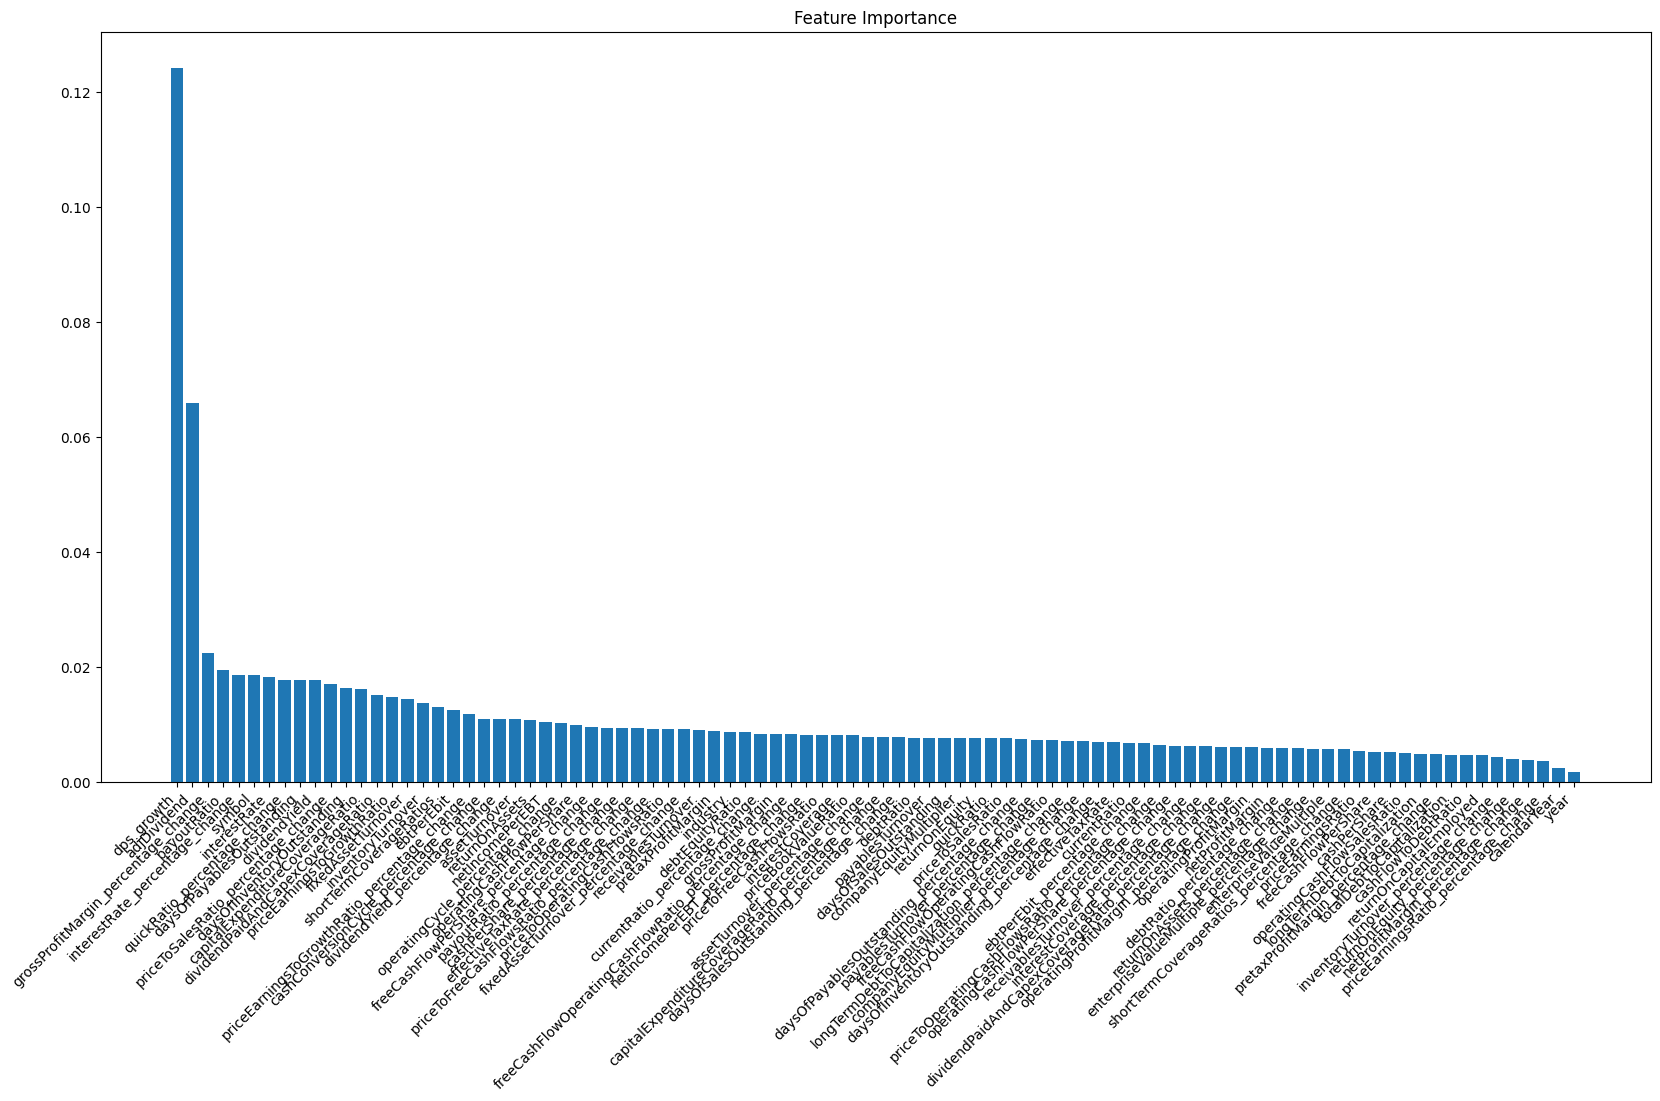

In [10]:
# Plot a bar chart to visualize feature importance
plt.figure(figsize=(20, 10))
# sns.barplot(data=importance_table, x="Feature", y="Importance")
plt.bar(importance_table_sorted['Feature'], importance_table_sorted['Importance'])
plt.title("Feature Importance")
plt.subplots_adjust(bottom=0.2, top=0.95)
plt.xticks(rotation=45, ha='right')
plt.show()

## Check model performance with feature importance

In [11]:
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()

# Initialize the result dataframe
result_df = pd.DataFrame(columns=['Features_Removed', 'ROC_Score'])

# First, evaluate performance using all features
randomForestModel = RandomForestClassifier(max_features=None)
randomForestModel.fit(X_train_temp, y_train)
# Predict probabilities on test data
y_pred_probs = randomForestModel.predict_proba(X_test_temp)[:, 1]
# Compute ROC score
roc_score = roc_auc_score(y_test, y_pred_probs)
# Append the initial result to the result dataframe
new_row = pd.DataFrame({'Features_Removed': ['None'], 'ROC_Score': [roc_score]})
result_df = pd.concat([result_df, new_row])
# result_df = result_df.append({'Features_Removed': 'None', 'ROC_Score': roc_score}, ignore_index=True)
print(f"Feature_Removed: None, Number of features used: {len(X_train_temp.columns)}, ROC_AUC_Score: {roc_score}")

# Sort importance_table by Importance in ascending order to start with the least important
importance_table_sorted_asc = importance_table.sort_values('Importance', ascending=True)

# Loop through features, starting from the least important
for index, row in importance_table_sorted_asc.iterrows():
    # Drop the feature from training and test data
    X_train_temp = X_train_temp.drop(columns=[row['Feature']])
    X_test_temp = X_test_temp.drop(columns=[row['Feature']])
    # Train a random forest model
    randomForestModel = RandomForestClassifier(max_features=None)
    randomForestModel.fit(X_train_temp, y_train)
    # Predict probabilities on test data
    y_pred_probs = randomForestModel.predict_proba(X_test_temp)[:, 1]
    # Compute ROC score
    roc_score = roc_auc_score(y_test, y_pred_probs)
    # Append the result to the result dataframe
    new_row = pd.DataFrame({'Features_Removed': [row['Feature']], 'ROC_Score': [roc_score]})
    result_df = pd.concat([result_df, new_row])
    # result_df = result_df.append({'Features_Removed': row['Feature'], 'ROC_Score': roc_score}, ignore_index=True)
    print(
        f"Feature_Removed: {row['Feature']}, Number of features used: {len(X_train_temp.columns)}, ROC_AUC_Score: {roc_score}")
    # If only one feature left, break the loop
    if X_train_temp.shape[1] == 1:
        break

/tmp/ipykernel_26682/2520037336.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result_df = pd.concat([result_df, new_row])


Feature_Removed: None, Number of features used: 92, ROC_AUC_Score: 0.73552290406223
Feature_Removed: year, Number of features used: 91, ROC_AUC_Score: 0.7288677614520311
Feature_Removed: calendarYear, Number of features used: 90, ROC_AUC_Score: 0.7229472774416595
Feature_Removed: priceEarningsRatio_percentage_change, Number of features used: 89, ROC_AUC_Score: 0.7634831460674159
Feature_Removed: netProfitMargin_percentage_change, Number of features used: 88, ROC_AUC_Score: 0.7713915298184961
Feature_Removed: returnOnEquity_percentage_change, Number of features used: 87, ROC_AUC_Score: 0.7461106309420916
Feature_Removed: inventoryTurnover_percentage_change, Number of features used: 86, ROC_AUC_Score: 0.7296888504753674
Feature_Removed: returnOnCapitalEmployed, Number of features used: 85, ROC_AUC_Score: 0.7795592048401037
Feature_Removed: cashFlowToDebtRatio, Number of features used: 84, ROC_AUC_Score: 0.7152981849611064
Feature_Removed: totalDebtToCapitalization, Number of features use

In [12]:
result_df.reset_index(inplace=True, drop=True)
model_performance_with_feature_drop_path = proj_root.joinpath(config['modelling_paths']['model_performance_with_feature_drop'])
result_df.to_csv(model_performance_with_feature_drop_path, index=False)

In [19]:
result_df['ROC_Score'].max()

0.7906655142610198

In [13]:
# result_df[result_df.index==result_df['ROC_Score'].argmax()]['Features_Removed'].values[0]

feature_removed_before_max_score = result_df.iloc[result_df['ROC_Score'].argmax(), :]['Features_Removed']

feature_rank_thresh = importance_table_sorted.index[importance_table_sorted['Feature'] == feature_removed_before_max_score][0]

max_score_features = list(importance_table_sorted[importance_table_sorted.index < feature_rank_thresh]['Feature'].values)

max_score_features



utils.save_value(value=max_score_features, fname=proj_root.joinpath(config['modelling_paths']['optimal_features']))

In [14]:
utils.load_value(fname=proj_root.joinpath(config['modelling_paths']['optimal_features']))

['dps_growth',
 'adjDividend',
 'grossProfitMargin_percentage_change',
 'payoutRatio',
 'interestRate_percentage_change',
 'symbol',
 'interestRate',
 'quickRatio_percentage_change',
 'daysOfPayablesOutstanding',
 'dividendYield',
 'priceToSalesRatio_percentage_change',
 'daysOfInventoryOutstanding',
 'capitalExpenditureCoverageRatio',
 'dividendPaidAndCapexCoverageRatio',
 'priceEarningsToGrowthRatio',
 'fixedAssetTurnover',
 'inventoryTurnover',
 'shortTermCoverageRatios',
 'ebtPerEbit',
 'priceEarningsToGrowthRatio_percentage_change',
 'cashConversionCycle_percentage_change',
 'dividendYield_percentage_change']

In [38]:
# utils.load_value(fname=proj_root.joinpath(config['modelling_paths']['optimal_features']))

['dps_growth',
 'adjDividend',
 'dividendYield',
 'priceToSalesRatio_percentage_change',
 'symbol',
 'interestRate',
 'dividendPaidAndCapexCoverageRatio',
 'interestRate_percentage_change',
 'daysOfPayablesOutstanding',
 'dividendYield_percentage_change',
 'priceEarningsToGrowthRatio']

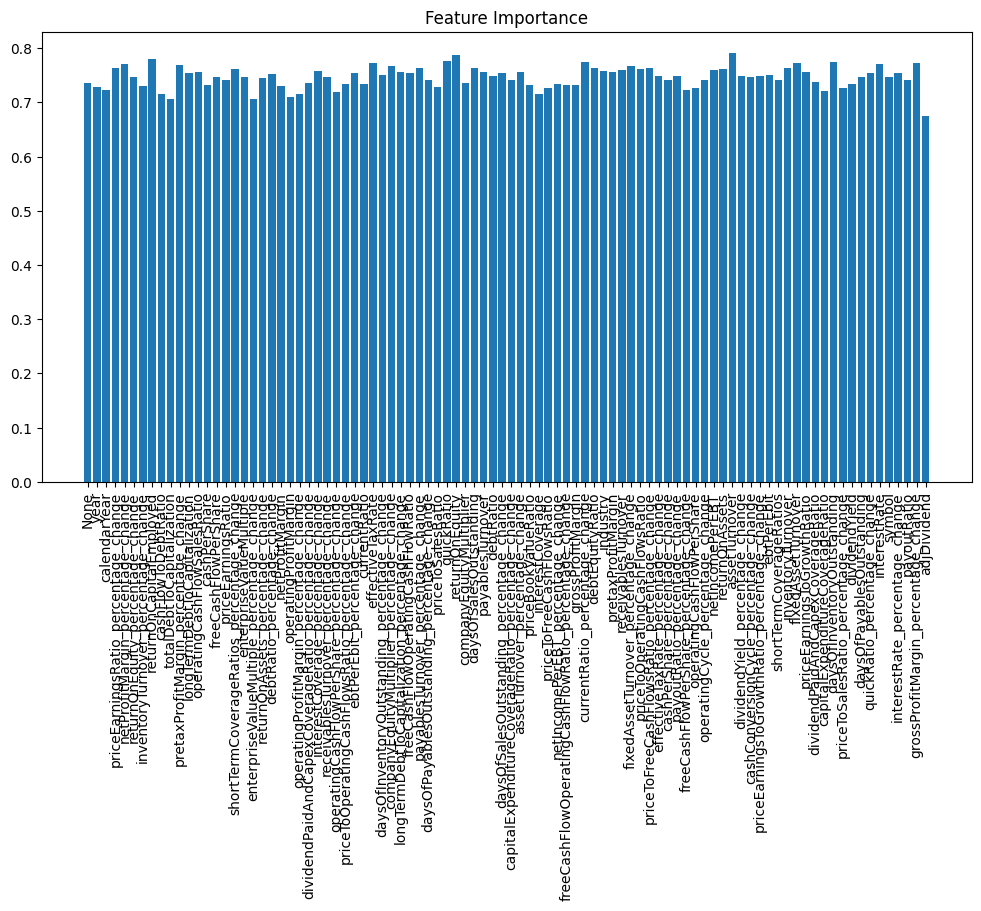

In [20]:
result_df

fig, ax = plt.subplots(figsize=(12, 6))
# plt.close()

ax.bar(result_df['Features_Removed'], result_df['ROC_Score'])

plt.title("Feature Importance")
plt.subplots_adjust(bottom=0.2, top=0.95)
plt.xticks(rotation=90,  )
plt.show()